#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to 
understand the distribution and relationships between the variables..

In [1]:
import pandas as pd
# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


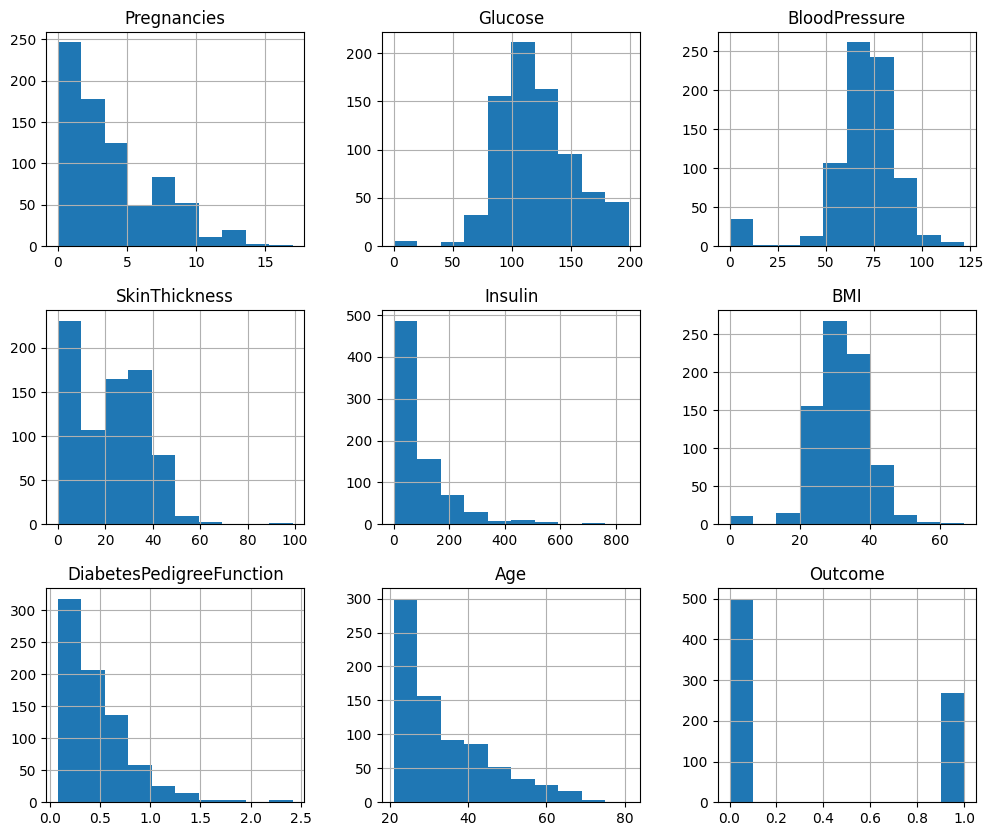

In [9]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.show()

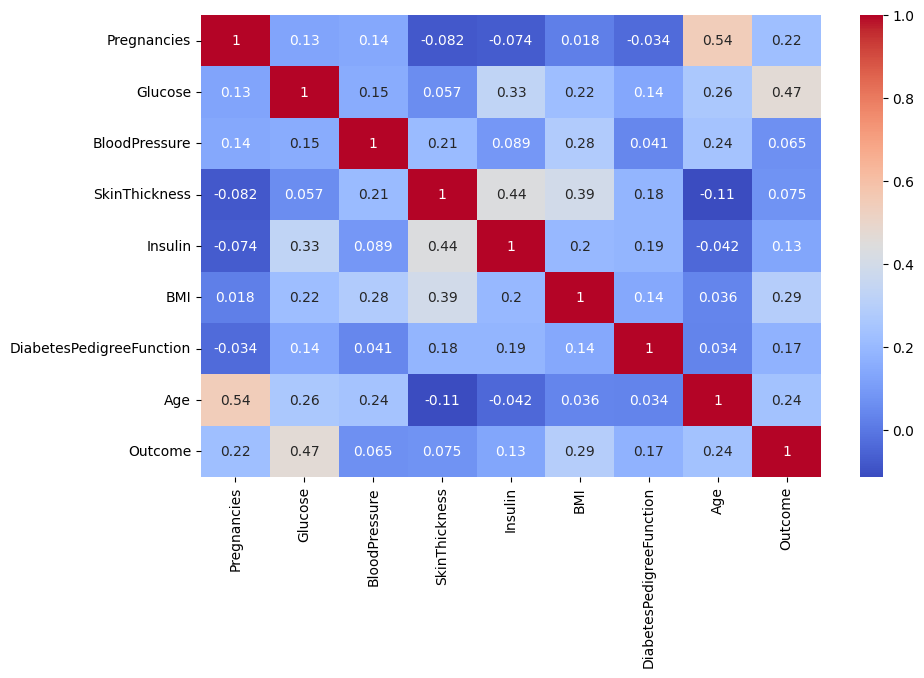

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


#### insights 
Glucose and BMI might have strong correlations with the target variable Outcome.

#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [11]:
## missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

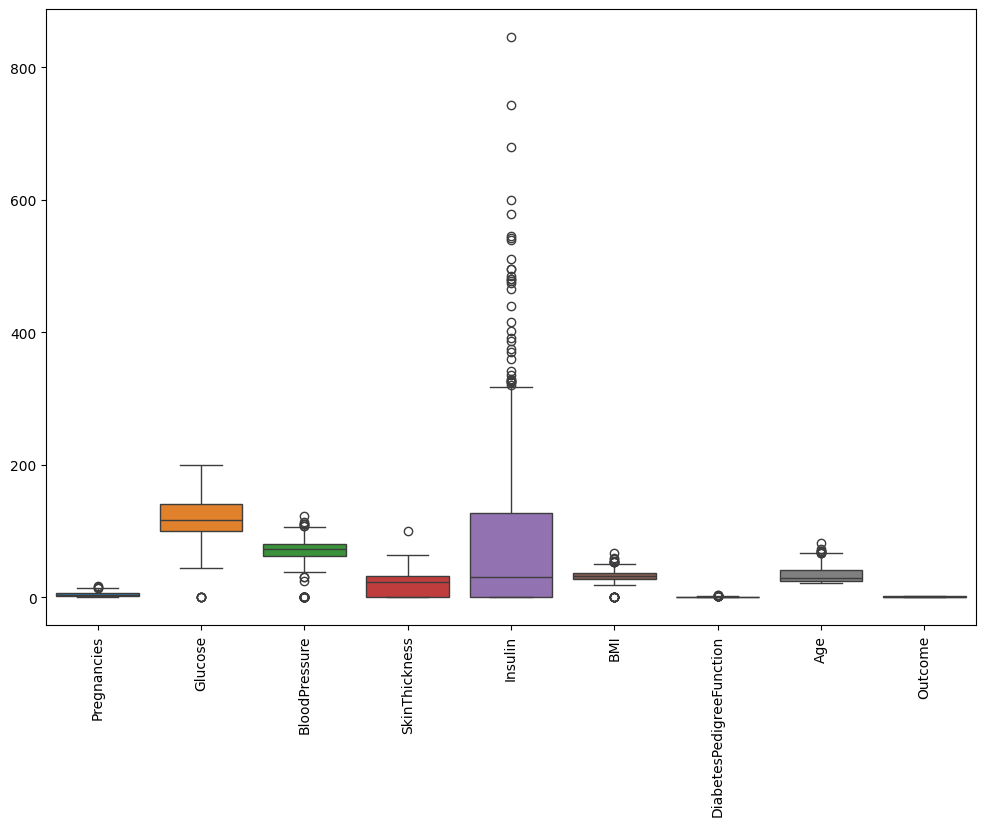

In [14]:
### Handling Outliers:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Removing outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Outcome', axis=1)), columns=df.columns[:-1])
df_scaled['Outcome'] = df['Outcome']

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [18]:
from sklearn.model_selection import train_test_split
# Assuming 'df' is the preprocessed DataFrame
X = df.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y = df['Outcome']               # Target (Outcome column)


In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 511 samples
Test set size: 128 samples


### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [22]:
dt = DecisionTreeClassifier(random_state=42)

In [23]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [24]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [26]:
best_model = grid_search.best_estimator_

In [27]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.77


### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,  precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results..

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.77
Precision: 0.71
Recall: 0.28
F1 Score: 0.40


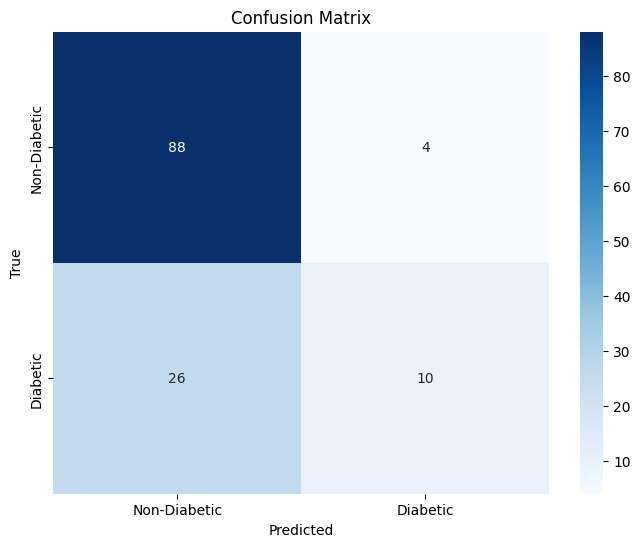

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


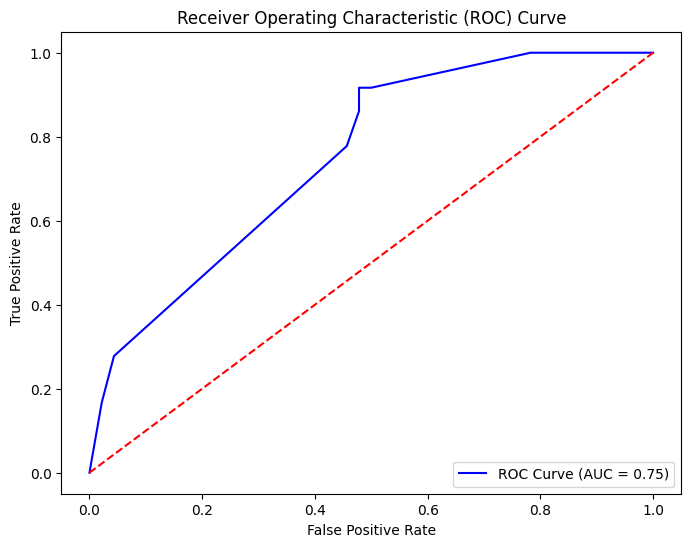

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

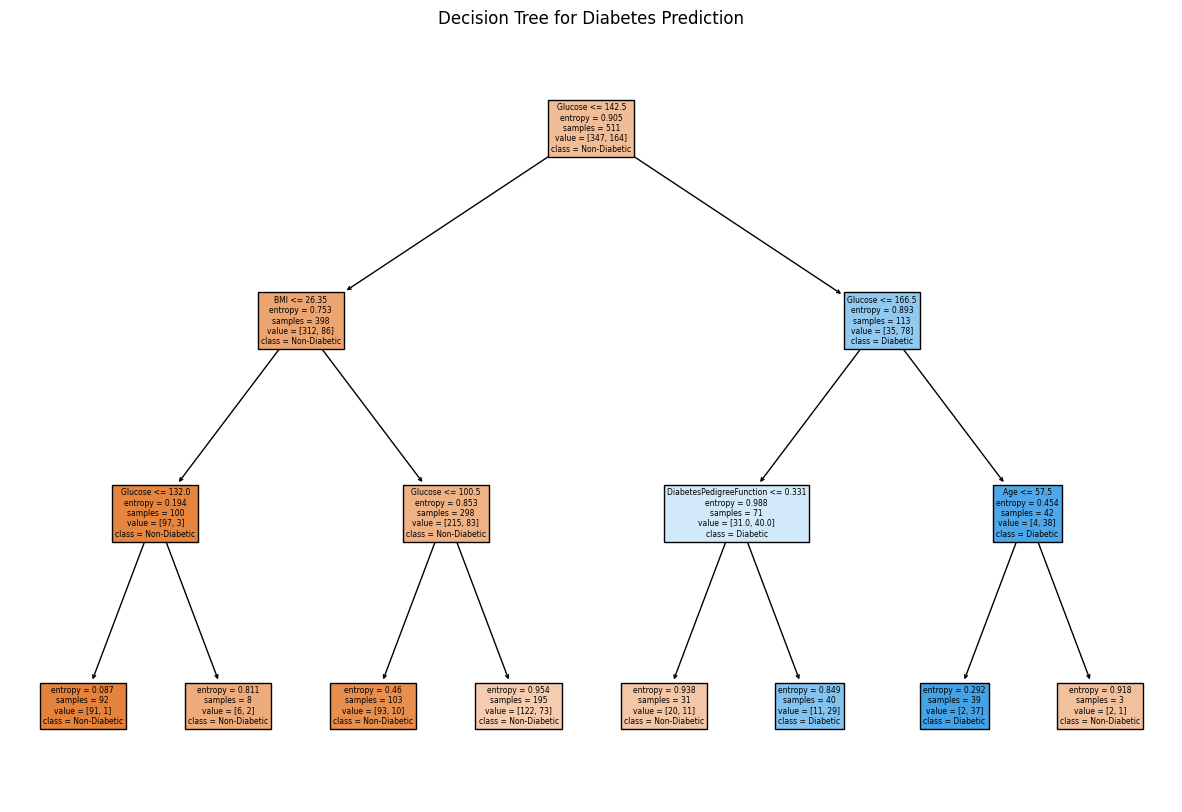

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.title("Decision Tree for Diabetes Prediction")
plt.show()


1. Structure of the Decision Tree:
A decision tree is made up of nodes (splits), branches (paths), and leaves (outcomes). Each node represents a feature and a threshold, while each leaf represents the predicted outcome.

Root Node: The topmost node where the first split occurs, often involving the feature that best separates the classes (e.g., “Glucose”).
Splits: Each internal node represents a decision based on a feature (e.g., “Is Glucose > 125?”).
Leaves: Terminal nodes that indicate the predicted class (0 for non-diabetic, 1 for diabetic).

2. Analyzing Splits:
Each split in the tree corresponds to a condition on one of the features. For instance, if the first split is on “Glucose” with a threshold of 125, it means that if a patient’s glucose level is above 125, the path will take a certain branch toward predicting diabetes, while a level below or equal to 125 will take a different path.

4. Most Important Variables:
To identify the most important variables, you can examine:

Feature Importance Scores: Many libraries, like scikit-learn, provide a way to extract the importance of each feature based on how much they reduce impurity (e.g., Gini or entropy) at each split.
Common Features in Splits: Features that appear frequently in the splits tend to have a higher impact on predictions.
4. Threshold Values:
Each split has a threshold that helps decide the branching. For example, if “BMI” is split at 30, it indicates that patients with a BMI greater than 30 are categorized differently from those with a BMI less than or equal to 30.

5. Domain Knowledge Interpretation:
Using domain knowledge about diabetes, we can make sense of the splits:

Glucose Levels: High plasma glucose levels are a known risk factor for diabetes, so it’s expected that this feature would be one of the first splits in the tree.
BMI and Age: Both of these are important in assessing diabetes risk; higher BMI and older age often correlate with increased risk.
Insulin and Blood Pressure: Elevated insulin levels and blood pressure can indicate metabolic issues associated with diabetes.

6. Patterns and Trends:
High Glucose Levels: If the tree frequently splits on glucose levels, it highlights the significance of this measurement in predicting diabetes.
BMI: If many branches involve BMI, it suggests a trend where overweight individuals are at a higher risk.
Interactions Between Features: The tree may also show interactions, such as how glucose levels combined with BMI affect the likelihood of diabetes.

### Conclusion:

By interpreting the decision tree, we can gain insights into how different clinical variables contribute to predicting diabetes. This understanding can help healthcare professionals make informed decisions based on patient data, leading to more personalized care and preventive measures.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

###  Validating the Decision Tree Model 

Validation is a critical step to ensure that the decision tree model generalizes well to new data and is robust under different conditions. This involves applying the model to unseen data and conducting various tests to assess its reliability, robustness, and sensitivity. Here’s a detailed explanation of how you can validate the decision tree model for predicting diabetes.

### **1. Applying the Model to New Data:**
To validate the model, apply it to new, unseen data to check its performance:
- **Test Set Evaluation:** After training the decision tree on the training set, use the test set (which the model has never seen) to predict outcomes. Evaluate the model’s accuracy, precision, recall, F1-score, and other metrics on this test set.
- **Example:** Predict whether new patients are diabetic based on their clinical data (glucose levels, BMI, age, etc.) and compare predictions with the actual labels.

### **2. Cross-Validation:**
Using **k-fold cross-validation** can provide a more reliable estimate of model performance:
- Split the data into *k* subsets (or "folds").
- Train the model on *k-1* subsets and test it on the remaining one.
- Repeat this process *k* times, with each fold serving as the test set once, then average the results.
  
This helps avoid overfitting and ensures that the model performs well on different parts of the dataset.

### **3. Sensitivity Analysis:**
This involves testing how sensitive the decision tree model is to small changes in the input data:
- **Perturb Data:** Slightly modify the values of certain features (e.g., increase glucose levels by 5% or decrease BMI by 2%) and observe how the model’s predictions change.
- **Objective:** Understand which variables have the most impact on the prediction and assess whether the model is overly reliant on any particular feature.

#### **Example of Sensitivity Analysis:**
- Slightly increase glucose levels for patients in the test set and check if the model’s predictions for diabetes change significantly. If small changes lead to drastically different predictions, it may indicate that the model is too sensitive to that feature.

### **4. Scenario Testing:**
Scenario testing helps explore how the model behaves under different real-world conditions:
- **Simulating Different Environments:** For example, simulate a scenario where patients’ average age is much lower or where glucose levels are generally higher (like in a different geographic region).
- **Edge Cases:** Test extreme cases, such as very high glucose or insulin levels, to see if the model still makes reasonable predictions.

#### **Example of Scenario Testing:**
- **High-Risk Population:** Test how the model performs in a population with generally higher glucose and BMI levels (e.g., older individuals).
- **Low-Risk Population:** See how the model predicts diabetes in younger individuals with low BMI, potentially identifying whether the model is too skewed toward high-risk features.

### **5. Model Stability and Generalization:**
To ensure the model is stable and generalizes well:
- **Test Robustness to Outliers:** Add outliers or extreme values to the test data to check if the model can still make accurate predictions or if it’s heavily influenced by outliers.
- **Dataset Shifts:** Validate the model on a dataset from a different time period or geographical area to see if it adapts well to changes in the environment.

### **6. Scenario Example:**
Consider two scenarios for sensitivity and robustness testing:
- **Scenario 1: Older Population with High BMI:** Apply the model to a new set of older patients with higher BMI values. Check if the model is robust enough to handle these cases without losing accuracy.
- **Scenario 2: Younger Population with Normal BMI:** Test the model on a group of younger patients who typically have a lower risk of diabetes and analyze whether the predictions hold.

### **7. Uncertainty and Risk:**
- **Uncertainty in Predictions:** Investigate how certain the model is about its predictions, especially for borderline cases (e.g., patients with glucose levels near the threshold).
- **Risk Management:** Assess the risk of false positives (predicting diabetes when the patient is non-diabetic) and false negatives (predicting non-diabetic when the patient is diabetic), which could have real-world health consequences.

### **Conclusion:**
Validating a decision tree model involves more than just measuring its accuracy on a test set. By applying techniques like cross-validation, sensitivity analysis, and scenario testing, you ensure the model is robust, generalizes well, and is stable under different real-world conditions. This helps to mitigate risks and provides confidence that the model will perform reliably when deployed in a clinical setting.